# Homework Module 2: Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [3]:
!wget -O data/homework_data.csv $data

--2025-10-07 21:23:00--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘data/homework_data.csv’

data/homework_data. 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-10-07 21:23:00 (22.5 MB/s) - ‘data/homework_data.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv('data/homework_data.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

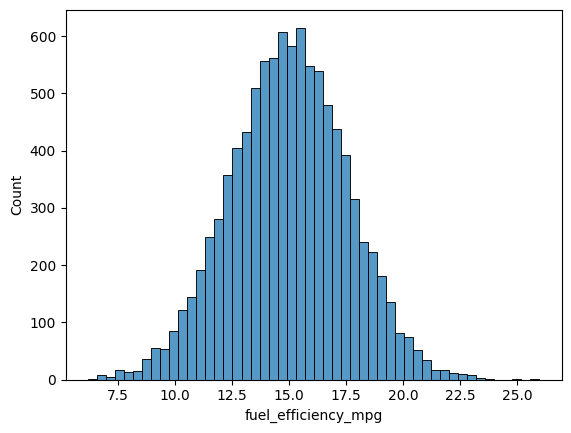

In [6]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

Q. Look at the fuel_efficiency_mpg variable. Does it have a long tail?
A. No, it doesn't

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

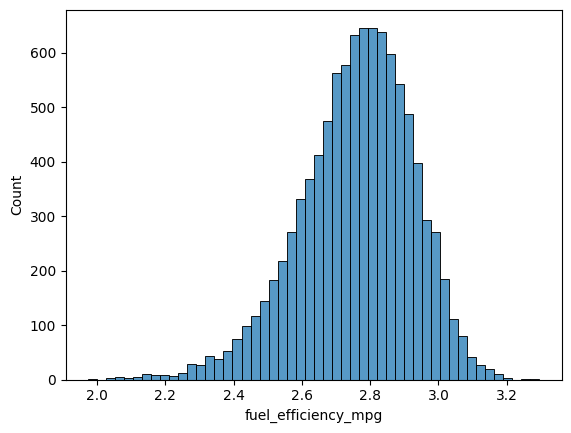

In [7]:
# What happens if we apply the log transformation to the target? It doesn't look like a normal distribution as it would if we didn't apply the log transformation.
fuel_efficiency_logs = np.log1p(df.fuel_efficiency_mpg)
sns.histplot(fuel_efficiency_logs, bins=50)

## Question 1.
There's one column with missing values. What is it?

- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'

In [8]:
df.isnull().sum()[lambda x: x > 0]

horsepower    708
dtype: int64

## Question 2.
What's the median (50% percentile) for variable 'horsepower'?
- 49
- 99
- 149
- 199

In [9]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.


In [10]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_train + n_val + n_test
print(n, n_train, n_val, n_test)

9704 5824 1940 1940


In [11]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [12]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# Target values
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [15]:
# Removing target from dataframes
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [16]:
def train_linear_regression(X, y):
    ones = np.ones((X.shape[0]))
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w # Return intercept and weights

In [17]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Filling missing values with 0

In [18]:
X_train = df_train.fillna(0).values
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [19]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [20]:
# Prepare validation set
X_val = df_val.fillna(0).values
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [21]:
# Make predictions
y_pred = w0 + X_train.dot(w)
y_pred

array([17.33526223, 16.29296317, 17.69885099, ..., 17.54541307,
       18.78287539, 17.86564843], shape=(5824,))

<Axes: ylabel='Count'>

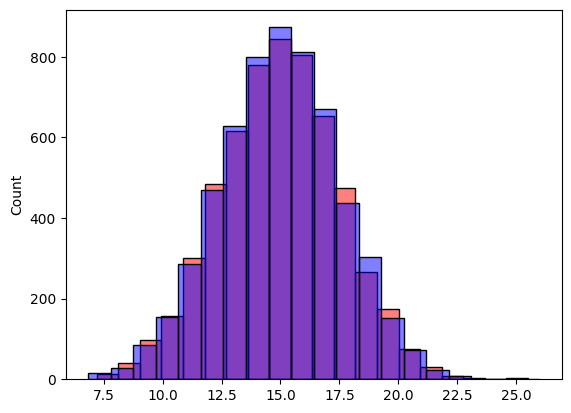

In [22]:
# Compare distributions of y_pred and y_train
sns.histplot(y_pred, color='red', alpha=0.5, bins=20)
sns.histplot(y_train, color='blue', alpha=0.5, bins=20)

In [23]:
# Train the model again on the training set and evaluate on the validation set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse_fill_0 = rmse(y_val, y_pred)
rmse_fill_0

np.float64(0.5173782638844466)

### Filling missing values with mean

In [24]:
X_train = df_train.fillna(df_train.mean()).values

In [25]:
# Prepare validation set
X_val = df_val.fillna(df_val.mean()).values
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(df.mean())
    X = df_num.values
    return X

In [26]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(28.925259951002698),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [27]:
# Make predictions
y_pred = w0 + X_train.dot(w)
y_pred

array([17.25910991, 16.19011261, 17.6924588 , ..., 17.51666431,
       18.77812427, 17.84593445], shape=(5824,))

<Axes: ylabel='Count'>

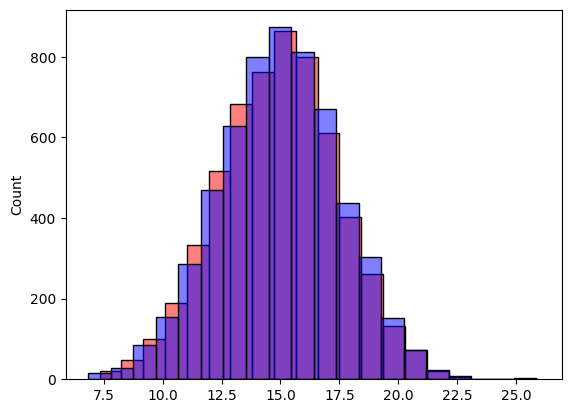

In [28]:
# Compare distributions of y_pred and y_train
sns.histplot(y_pred, color='red', alpha=0.5, bins=20)
sns.histplot(y_train, color='blue', alpha=0.5, bins=20)

In [29]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse_fill_mean = rmse(y_val, y_pred)
rmse_fill_mean

np.float64(0.4636236995020941)

In [30]:
print("RMSE with filling missing values with 0:", round(rmse_fill_0, 2))
print("RMSE with filling missing values with mean:", round(rmse_fill_mean, 2))

RMSE with filling missing values with 0: 0.52
RMSE with filling missing values with mean: 0.46


## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

**Options:**

- 0
- 0.01
- 1
- 10
- 100

In [31]:
# Prepare validation set
X_val = df_val.fillna(0).values
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [32]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones((X.shape[0]))
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) # Regularization

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w # Return intercept and weights

In [33]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_values:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, round(score, 5))

0 28.82736547365895 0.51738
0.01 24.92683841981215 0.51711
0.1 11.239661084581073 0.51875
1 1.7315979411219746 0.52223
5 0.3638075020482907 0.52289
10 0.18306246621686947 0.52298
100 0.01841801730688404 0.52306


## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

**What's the value of std?**

- 0.001
- 0.006
- 0.060
- 0.600
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [34]:
def split_dataset(df, lon_val=0.2, lon_test=0.2, seed=42):
    n = len(df)
    n_val = int(n * lon_val)
    n_test = int(n * lon_test)
    n_train = n - n_val - n_test
    n, n_train + n_val + n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    idx

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

    # Target values
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    # Removing target from dataframes
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [35]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [36]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seed_values:
    df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, lon_val=0.2, lon_test=0.2, seed=seed)

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train,)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)

    print(seed, w0, score)

0 27.376388746528697 0.5206531296294218
1 29.02246855416138 0.521338891285577
2 25.904357611049043 0.5228069974803171
3 28.015450067910564 0.515951674119676
4 25.93400040472635 0.5109129460053851
5 25.89950696063403 0.52834064601107
6 25.917230934138303 0.5313910658146311
7 28.414324731275375 0.5090670387381733
8 26.47841782687521 0.5147399129511132
9 27.513852581224892 0.5131865908224594


In [37]:
print("Standard deviation of the scores:", round(np.std(scores), 5))

Standard deviation of the scores: 0.00699


## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [38]:
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, lon_val=0.2, lon_test=0.2, seed=9)


In [39]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
df_full_train.shape

(7764, 4)

In [40]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[ 240.        ,  136.        , 4050.51228957, 2006.        ],
       [ 190.        ,  141.        , 3195.86694158, 2017.        ],
       [ 200.        ,  184.        , 3006.16436968, 2017.        ],
       ...,
       [ 180.        ,  154.        , 3346.96567067, 2018.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 260.        ,  174.        , 2702.25730066, 2011.        ]],
      shape=(7764, 4))

In [41]:
y_full_train = np.concat([y_train, y_val]) # There is no index.
y_full_train

array([10.30469994, 13.47943378, 16.19065297, ..., 13.67814034,
       17.59323665, 16.06897494], shape=(7764,))

In [42]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print("RMSE on test dataset:", score)

RMSE on test dataset: 0.5156261299169602
